## Deuxième Partie : Modele_Consommation_Energie


### Importation des Packages

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Modification des affichages de colonnes, lignes et largeurs de colonnes afin d'obtenir un maximum d'informations.

In [2]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes afin d'obtenir un maximum d'informations.
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_3553/847873684.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#### Importation des Librairies

In [3]:
# On affiche le chemin menant à notre dataset.
data = pd.read_csv('data_clean.csv')

#On affiche les 5 premières lignes du DataFrame
data.head()

,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,âge,Log2-SiteEnergyUseWN(kBtu)
0,2016,NonResidential,Mixed Use Property,820 4th Ave.,98104.0,7,DOWNTOWN,47.60515,-122.33159,1907.0,1.0,5.0,57452.0,0.0,57452.0,"Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall",Leisure,16442.0,Leisure,15505.0,NaN,7877219.00,273.02,109.0,22.909255
1,2016,NonResidential,Hotel/Senior Care/Housing,4242 ROOSEVELT WAY NE,98105.0,4,NORTHEAST,47.65959,-122.31755,2001.0,1.0,6.0,88592.0,30586.0,58006.0,"Hotel, Parking",Hotel/Senior Care/Housing,58006.0,Parking,30586.0,84.0,3673186.75,90.01,15.0,21.808601
2,2016,NonResidential,Hotel/Senior Care/Housing,1011 Pike ST,98101.0,7,EAST,47.61301,-122.32929,1991.0,1.0,8.0,158676.0,30301.0,128375.0,"Hotel, Parking, Retail Store, Swimming Pool",Hotel/Senior Care/Housing,112676.0,Parking,42000.0,NaN,5424942.00,256.57,25.0,22.371177
3,2016,NonResidential,Small- and Mid-Sized Office,5305 Shilshole Ave NW,98107.0,6,BALLARD,47.66587,-122.38476,1961.0,1.0,2.0,94900.0,0.0,94900.0,"Non-Refrigerated Warehouse, Office",Office,55586.0,Non-Refrigerated Warehouse,39314.0,57.0,6536359.50,130.56,55.0,22.640056
4,2016,NonResidential,Small- and Mid-Sized Office,2524 16th Ave S,98144.0,2,GREATER DUWAMISH,47.58034,-122.31132,1900.0,1.0,2.0,52554.0,0.0,52554.0,"Office, Other - Education",Office,51029.0,Education,7849.0,83.0,3150635.50,83.86,116.0,21.587212


In [4]:
# On affiche le type de variables du DataFrame
data.dtypes

DataYear                           int64  
BuildingType                       object 
PrimaryPropertyType                object 
Address                            object 
ZipCode                            float64
CouncilDistrictCode                int64  
Neighborhood                       object 
Latitude                           float64
Longitude                          float64
YearBuilt                          float64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                   float64
PropertyGFAParking                 float64
PropertyGFABuilding(s)             float64
ListOfAllPropertyUseTypes          object 
LargestPropertyUseType             object 
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ENERGYSTARScore                    float64
SiteEnergyUseWN(kBtu)              float64
TotalGHGEmissions                  float64
âge        

In [5]:
# On affiche la structure du DataFrame
data.shape

(1194, 25)

In [6]:
# Affichons le nombre de valeurs NaN de DataFrame
data.isna().sum().sum()

446

In [7]:
#sauvegarde séparée du energy star score
energy_star_score = data['ENERGYSTARScore']
data.drop('ENERGYSTARScore', axis=1, inplace=True)

In [8]:
# On affiche la structure du DataFrame
data.shape

(1194, 24)

In [9]:
# Affichons le nombre de valeurs NaN de DataFrame
data.isna().sum().sum()

0

#### Préparation des vecteurs et matrices
- Séparation X et y

- En divisant le DataFrame data en X et y, on se prépare pour un modèle d'apprentissage automatique où X est utilisé comme jeu de données d'entraînement pour les variables prédictives et y est utilisé comme jeu de données d'entraînement pour la variable à prédire. 

In [10]:
y = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_3553/4289038901.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]


#### Normalisation & One Hot Encoder


- On sélectionne les colonnes de type 'category' ou 'object' du DataFrame X, puis pour chacune de ces colonnes, il renvoie le nombre d'éléments uniques (ou le nombre de catégories différentes) qu'elle contient. Cela peut être utile pour comprendre la diversité des données dans ces colonnes, par exemple, pour identifier des colonnes qui peuvent nécessiter un encodage catégorique avant d'être utilisées dans un modèle d'apprentissage automatique.

In [11]:
X.select_dtypes(['category','object']).nunique()

BuildingType                    7   
PrimaryPropertyType             18  
Address                         1191
Neighborhood                    18  
ListOfAllPropertyUseTypes       247 
LargestPropertyUseType          14  
SecondLargestPropertyUseType    20  
dtype: int64

In [12]:
# On affiche la structure de X
X.shape

(1194, 21)

On sépare les colonnes du DataFrame X en deux groupes distincts : les colonnes catégoriques et les colonnes numériques. Cette séparation est effectuée en fonction du type de données de chaque colonne.

In [13]:
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int32','float64']).columns

In [14]:
categorical_columns

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType'],
      dtype='object')

On effectue la standardisation des variables numériques et l'encodage one-hot des variables catégorielles, puis fusionne les résultats pour former un nouveau DataFrame avec les données prétraitées

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit_transform(X[categorical_columns])

X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names_out().tolist(),
              data = ohe.fit_transform(X[categorical_columns])),
        left_index = True, right_index = True)

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- Les catégories sorties du codage one-hot sont transformées en types de données appropriés.

On parcourt les colonnes du DataFrame X et recherche celles dont les noms correspondent à un motif spécifique 'x\d_'. Pour ces colonnes, il les convertit en un type de données entier de 32 bits. Cela pourrait être utile si les colonnes identifiées par ce motif devraient normalement être des entiers, mais étaient initialement enregistrées sous forme de chaînes de caractères ou d'autres types de données. La transformation permet de s'assurer que les données sont correctement représentées comme des entiers.

In [16]:
import re
regex = re.compile(r'x\d_')
for column in X.columns:
    if regex.search(column):
        X[column] = X[column].astype('int32')

In [17]:
X.sample(5)

,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,âge,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Education,PrimaryPropertyType_Health,PrimaryPropertyType_Hotel/Senior Care/Housing,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Leisure,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Retail,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_Warehouse,Address_100 6th Ave S,Address_100 NE Northlake Way,Address_100 West Harrison,Address_100 West Highland Drive,Address_1000 1st Ave W,Address_1000 1st Ave.,Address_1000 4TH AVE S,Address_1000 Aurora Ave N,Address_1000 E Pike St,Address_1000 Minor Ave,Address_1000 NE 88th St,Address_1000 Queen Anne Ave N,Address_1000 S WELLER ST,Address_1001 2nd Ave W,Address_1001 Alaskan Way,Address_1001 Fairview Ave N,Address_10015 Lake City Way NE,Address_1002 AIRPORT WAY S,Address_1004 Belmont Ave E,Address_1005 E Roy St,Address_1007 First Ave.,Address_101 Elliott Ave West,Address_101 N 104th ST 98133,Address_101 Yesler Way,Address_101 west olympic place,Address_1010 8th Ave S,Address_1011 5th Avenue N,Address_1011 East Terrace Street,Address_1011 Pike ST,Address_1011 Western Ave,Address_1013 8th Ave,Address_1014 1st Ave S,Address_1015 3rd Ave,Address_1015 Second Avenue,Address_1017 W Nickerson St,Address_1017 minor Ave,Address_1018 1st Ave,Address_1020 E. Denny Way,Address_1020 NE 63rd St.,Address_1020 University St,Address_1026 NE 65th St,Address_1029 Summit Ave E,Address_103 1st Ave,Address_103 Bellevue Ave E,Address_10301 Greenwood Ave N,Address_10303 Meridian Ave N,Address_1032 S. Jackson,Address_104 17th Ave South,Address_1045 6th Avenue South,Address_105 5th Ave S,Address_105 South Main St.,Address_1050 w nickerson/1050 w Ewing st.,Address_10521 Meridian ave N,Address_10545 Greenwood Ave. North,Address_106 Bell St,Address_107 Cherry St,Address_107 Occidental Ave S,Address_10700 Meridian Ave North,Address_10735 Roosevelt Way NE,Address_10740 8th AVE NE,Address_10757 Greenwood Ave N,Address_108 5th Avenue S,Address_108 South Washington St,...,"ListOfAllPropertyUseTypes_Office, Other - Lodging/Residential","ListOfAllPropertyUseTypes_Office, Other - Public Services, Personal Services (Health/Beauty, Dry Cleaning, etc), Senior Care Community","ListOfAllPropertyUseTypes_Office, Other - Recreation","ListOfAllPropertyUseTypes_Office, Other - Restaurant/Bar","ListOfAllPropertyUseTypes_Office, Other - Restaurant/Bar, Parking, Retail Store","ListOfAllPropertyUseTypes_Office, Other - Services","ListOfAllPropertyUseTypes_Office, Other - Utility, Parking","ListOfAllPropertyUseTypes_Office, Other, Other - Entertainment/Public Assembly","ListOfAllPropertyUseTypes_Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall","ListOfAllPropertyUseTypes_Office, Other, Other - Restaurant/Bar, Strip Mall","ListOfAllPropertyUseTypes_Office, Other, Other - Services, Residence Hall/Dormitory, Restaurant","ListOfAllPropertyUseTypes_Office, Other, Parking","ListOfAllPropertyUseTypes_Office, Other, Parking, Retail Store","ListOfAllPropertyUseTypes_Office, Other, Refrigerated Warehouse","ListOfAllPropertyUseTypes_Office, Other, Retail Store","ListOfAllPropertyUseTypes_Office, Other, Worship Facility","ListOfAllPropertyUseTypes_Office, Parking","ListOfAllPropertyUseTypes_Office, Parking, Personal Services (Hea

#### Infos sur X et y

In [18]:
X.shape

(1194, 1527)

In [19]:
y.shape

(1194, 3)

#### Séparation jeu de données
- Séparation test / train

- On divise les données contenues dans X et y['Log2-SiteEnergyUseWN(kBtu)'] en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test) en utilisant une proportion de 20% pour l'ensemble de test, tout en assurant la reproductibilité des résultats. Ces ensembles de formation et de test sont souvent utilisés pour entraîner et évaluer des modèles d'apprentissage automatique.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                        train_test_split(X, 
                                         y['Log2-SiteEnergyUseWN(kBtu)'],  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )

In [21]:
X_train.shape

(955, 1527)

In [22]:
X_test.shape

(239, 1527)

In [23]:
y_train.shape

(955,)

In [24]:
y_test.shape

(239,)

In [25]:
results = pd.DataFrame({})

On affiche le nombre total de valeurs manquantes dans chacun des ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test). Cela peut être utile pour vérifier la qualité des données et pour décider comment traiter les valeurs manquantes avant d'entraîner un modèle d'apprentissage automatique. Des valeurs manquantes importantes peuvent avoir un impact sur les performances du modèle, donc il est essentiel de les gérer de manière appropriée.

In [26]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())

0
0
0
0


### Modélisation

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

#### Ridge Regression / Random Forest Regressor / GradientBoost /  XGBoost

#### Ridge Regression

- On effectue une recherche en grille pour trouver les meilleurs hyperparamètres pour le modèle Ridge en utilisant la validation croisée. Une fois l'entraînement terminé, il affiche les meilleurs hyperparamètres trouvés ainsi que le meilleur score de performance obtenu avec ces hyperparamètres. Cette approche aide à choisir les hyperparamètres optimaux pour améliorer les performances du modèle Ridge dans la tâche de régression.

In [28]:
from sklearn.linear_model import Ridge

# Définition des paramètres pour la recherche en grille
parameters = {'alpha': np.logspace(-2, 4, 30)}

In [29]:
# Création de l'estimateur Ridge et de l'objet GridSearchCV
ridge_estimator = Ridge()
rid_grid = GridSearchCV(estimator=ridge_estimator,
                        param_grid=parameters,
                        verbose=2, # Contrôle la quantité d'informations affichées pendant l'exécution
                        cv=5) #Nombre de plis dans la validation croisée

# Entraînement du modèle avec la recherche en grille
rid_grid.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", rid_grid.best_params_)

# Meilleur score de performance
print("Meilleur score :", rid_grid.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................................alpha=0.01; total time=   0.7s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END ..........................alpha=0.01610262027560939; total time=   0.1s
[CV] END ..........................alpha=0.01610262027560939; total time=   0.1s
[CV] END ..........................alpha=0.01610262027560939; total time=   0.1s
[CV] END ..........................alpha=0.01610262027560939; total time=   0.1s
[CV] END ..........................alpha=0.01610262027560939; total time=   0.1s
[CV] END ..........................alpha=0.02592943797404667; total time=   0.1s
[CV] END ..........................alpha=0.0259

In [30]:
rid_grid.best_estimator_

Ridge(alpha=3.039195382313198)

#### Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
# Définir les hyperparamètres à tester
parameters = {
    'n_estimators': [10, 50, 100, 300, 500],  # Nombre d'arbres de décision
    'min_samples_leaf': [1, 3, 5, 10],        # Nombre de feuilles minimales dans un nœud
    'max_features': ['auto', 'sqrt']         # Nombre de features observées pour chaque arbre
}


In [32]:
# Créer l'estimateur RandomForestRegressor et le configurer pour la recherche des hyperparamètres
rfr = RandomForestRegressor()
rfr_search = GridSearchCV(estimator=rfr, 
                          param_grid=parameters, 
                          verbose=2,  # Contrôle la quantité d'informations affichées pendant l'exécution
                          cv=5)  #Nombre de plis dans la validation croisée

# Effectuer la recherche des meilleurs hyperparamètres en utilisant GridSearchCV
rfr_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", rfr_search.best_params_)

# Meilleur score de performance
print("Meilleur score :", rfr_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END max_

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Use

Meilleurs hyperparamètres : {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}
Meilleur score : 0.7067352089436242


In [33]:
rfr_search.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=500)

In [34]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

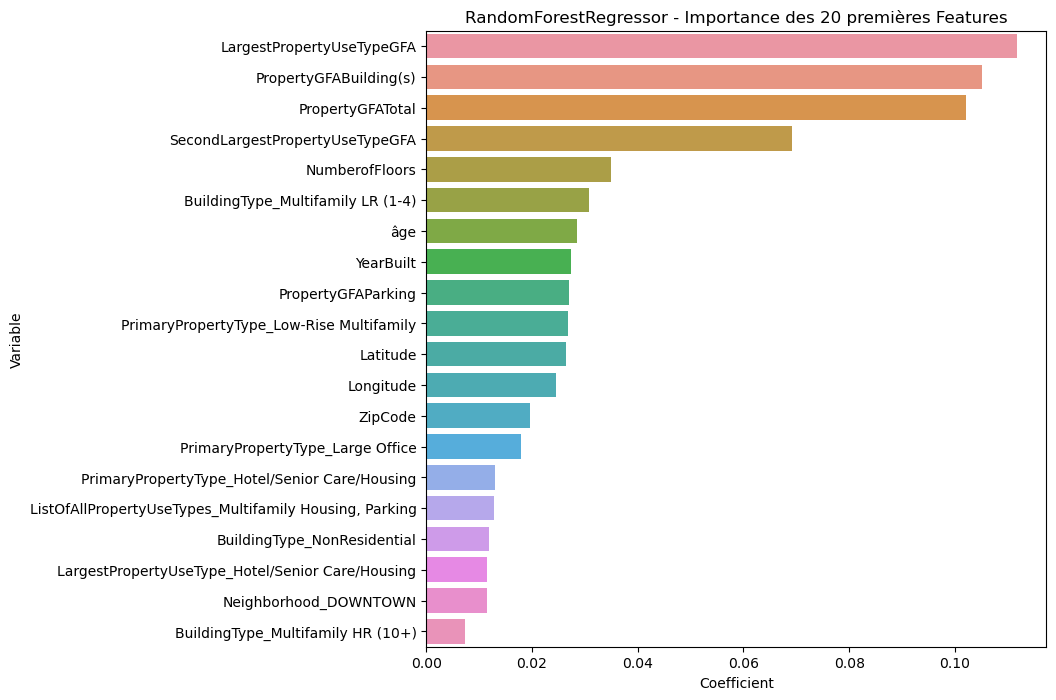

In [35]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 20 premières Features')
sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))
plt.show()

#### Gradient Boosting Regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
# Définition des hyperparamètres à tester
parameters = {
    'n_estimators': [50, 100, 150,200], # Nombre d'arbres de décision
    'learning_rate': [0.01,0.1,0.5],# Nombre de feuilles minimales dans un nœud
    'max_depth': [3,5,7] # Nombre de features observées pour chaque arbre
}

# Initialisation du modèle et de la recherche grid
gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(estimator=gbr,
                        param_grid=parameters,
                        
                        cv=5,# Nombre de plis dans la validation croisée
                        verbose=2) # Contrôle la quantité d'informations affichées pendant l'exécution

# Entraînement du modèle sur les données d'entraînement
gbr_grid.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", gbr_grid.best_params_)

# Meilleur score de performance
print("Meilleur score :", gbr_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [38]:
gbr_grid.best_estimator_

GradientBoostingRegressor(n_estimators=150)

#### XGBoost

In [39]:
from xgboost import XGBRegressor

In [40]:
parameters =  {
    'n_estimators' : [100,500,1000,2000]
}

# Définir les hyperparamètres que vous souhaitez rechercher
parameters = {
    'n_estimators': [100, 500, 1000, 2000]
}

# Créer l'objet GridSearchCV avec le modèle XGBRegressor et les hyperparamètres définis
xgb_grid = GridSearchCV(
    XGBRegressor(n_jobs=-1),  # Utilisez n_jobs=-1 pour tirer parti de tous les cœurs CPU disponibles
    param_grid=parameters,
    cv=5,  # Nombre de plis dans la validation croisée
    verbose=2  # Contrôle la quantité d'informations affichées pendant l'exécution
)

# Exécuter la recherche de grille en utilisant les données d'entraînement (X_train, y_train)
xgb_grid.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", xgb_grid.best_params_)

# Meilleur score de performance
print("Meilleur score :", xgb_grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................................n_estimators=100; total time=   5.0s
[CV] END ...................................n_estimators=100; total time=   5.0s
[CV] END ...................................n_estimators=100; total time=   4.1s
[CV] END ...................................n_estimators=100; total time=   4.1s
[CV] END ...................................n_estimators=100; total time=   4.1s
[CV] END ...................................n_estimators=500; total time=  22.5s
[CV] END ...................................n_estimators=500; total time=  20.9s
[CV] END ...................................n_estimators=500; total time=  21.3s
[CV] END ...................................n_estimators=500; total time=  21.6s
[CV] END ...................................n_estimators=500; total time=  21.0s
[CV] END ..................................n_estimators=1000; total time=  42.6s
[CV] END ..................................n_esti

In [41]:
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
xgb_grid.best_estimator_.feature_importances_

array([0.00130444, 0.00196554, 0.00275151, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

#### Export des modèles pour réutilisation ultérieure

On définit un dictionnaire qui associe le nom de chaque modèle de régression à son meilleur estimateur (modèle entraîné avec les meilleurs hyperparamètres) obtenu à partir de différentes recherches sur grille pour chaque modèle. Cela permet de stocker et d'accéder facilement aux meilleurs modèles pour une utilisation ultérieure.

In [43]:
dict_modeles = {
    'Ridge': rid_grid.best_estimator_,
    'Random Forest Regressor' : rfr_search.best_estimator_,
    'Gradient Boosting Regressor' : gbr_grid.best_estimator_,
    'XGBoost' : xgb_grid.best_estimator_,
}

In [44]:
import os
import pickle

# Créer le répertoire 'models' s'il n'existe pas
directory = 'models'
if not os.path.exists(directory):
    os.makedirs(directory)
    
# Enregistrer les modèles
for nom, model in dict_modeles.items():
    filename = os.path.join(directory, nom + '.obj')
    with open(filename, 'wb') as filehandler:
        pickle.dump(model, filehandler)

In [45]:
#Export du one hot encoder

with  open('models/onehotencoder.obj', 'wb') as filehandler :
    pickle.dump(ohe, filehandler)
    
#export du standardscaler
with  open('models/standardscaler.obj', 'wb') as filehandler :
    pickle.dump(ss, filehandler)

#### Chargement des modèles

In [46]:
dict_modeles_new = dict_modeles

In [47]:
dict_modeles_new = {}

On charge tous les modèles sauvegardés (pickles) à l'exception de "onehotencoder.obj" et "standardscaler.obj" à partir du répertoire 'models', puis les stocke dans un dictionnaire dict_modeles_new en utilisant le nom du fichier en tant que clé pour chaque modèle chargé.

In [48]:
import glob
import pickle
for filename in glob.glob('models/*'):
    if filename not in ['models\onehotencoder.obj', 'models\standardscaler.obj']:
        with open(filename, 'rb') as filehandler:
            print(filename)
            dict_modeles_new[str(filename)] = pickle.load(filehandler)

models/Ridge.obj
models/Random Forest Regressor.obj
models/rfr_emissions.obj
models/XGBoost.obj
models/onehotencoder.obj
models/Gradient Boosting Regressor.obj
models/gbr_emissions.obj
models/standardscaler.obj


In [49]:
dict_modeles_new['models/XGBoost.obj'].feature_importances_

array([0.00130444, 0.00196554, 0.00275151, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

#### Comparaison des modèles


- On extrait toutes les clés du dictionnaire 'dict_modeles' et les place dans une liste.

In [50]:
list(dict_modeles.keys())

['Ridge', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost']

Essayons d'évaluer le rendement de différents modèles de régression en utilisant diverses mesures. Plus précisément, nous allons calculer l'erreur quadratique moyenne (RMSE), le coefficient de détermination (R2) et une version normalisée du RMSE.

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error
import math


nom_modeles = ['Ridge', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost']
liste_modeles = [dict_modeles['Ridge'],
                 dict_modeles['Random Forest Regressor'],
                 dict_modeles['Gradient Boosting Regressor'],
                 dict_modeles['XGBoost']
                ]

comparaison_score = pd.DataFrame(index = nom_modeles, columns = ['RMSE', 'R²', 'RMSE_relative'])

for nom_modele, modele in zip(nom_modeles, liste_modeles):
    comparaison_score.loc[nom_modele, 'RMSE'] = math.sqrt(mean_squared_error(y_test, modele.predict(X_test)))
    comparaison_score.loc[nom_modele, 'R²'] = r2_score(y_test, modele.predict(X_test))

#normalisation RMSE
comparaison_score['RMSE_relative'] = comparaison_score['RMSE'].divide(comparaison_score['RMSE'].max())

- Ce code calcule le RMSE, le R² et le RMSE normalisé pour chaque modèle et stocke les résultats dans un DataFrame appelé comparaison_score.

In [52]:
comparaison_score

,RMSE,R²,RMSE_relative
Ridge,0.750561,0.606933,1.0
Random Forest Regressor,0.651582,0.703767,0.868128
Gradient Boosting Regressor,0.639401,0.714739,0.851898
XGBoost,0.673558,0.683448,0.897406


-  Le Gradient Boosting Regressor semble plus rapide à entraîner.

itérer à travers une liste de modèles, effectuer des prédictions sur un jeu de données (X_train) à l'aide de chaque modèle, et mesurer le temps d'exécution de chaque prédiction à l'aide de la fonction %timeit.

In [53]:
i=0
for modele in liste_modeles:
    print(nom_modeles[i], ': ')
    i+=1
    %timeit modele.predict(X_train)
    print('')

Ridge : 
13.2 ms ± 2.5 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

Random Forest Regressor : 
194 ms ± 6.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Gradient Boosting Regressor : 
21.7 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

XGBoost : 
89.4 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



- On affiche le nom de chaque modèle à l'aide d'une liste correspondante de noms de modèles ("nom_modeles"), effectue une prédiction sur les données d'entraînement pour chaque modèle et affiche le temps d'exécution de chaque prédiction. 

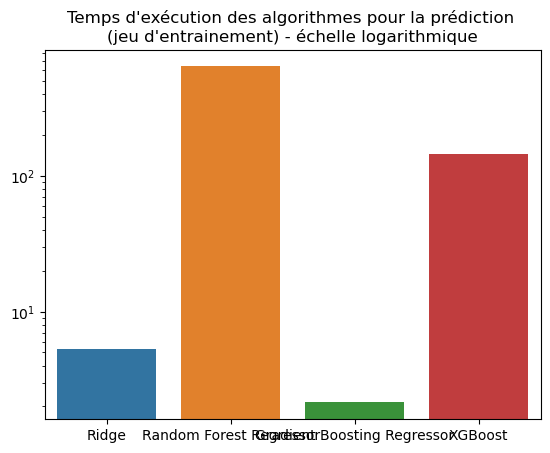

In [54]:
plt.title('Temps d\'exécution des algorithmes pour la prédiction \n(jeu d\'entrainement) - échelle logarithmique')
sns.barplot(x=nom_modeles,
           y = [5.32, 640, 2.14, 145])
ax = plt.gca()
ax.set_yscale('log')

- Le temps d'exécution du Gradient Boosting Regressor est plus faible que celui du Ridge, ce qui peut être un critère à prendre en compte lors du choix du modèle qui implique une forte performances par rapport aux trois autres modèles.

In [55]:
comparaison_score_melt = pd.melt(comparaison_score.reset_index(), id_vars = ['index'], value_name = 'score', value_vars=['R²', 'RMSE_relative'])

Text(0.5, 1.0, 'Comparaison des performances des modèles (Jeu de test)')

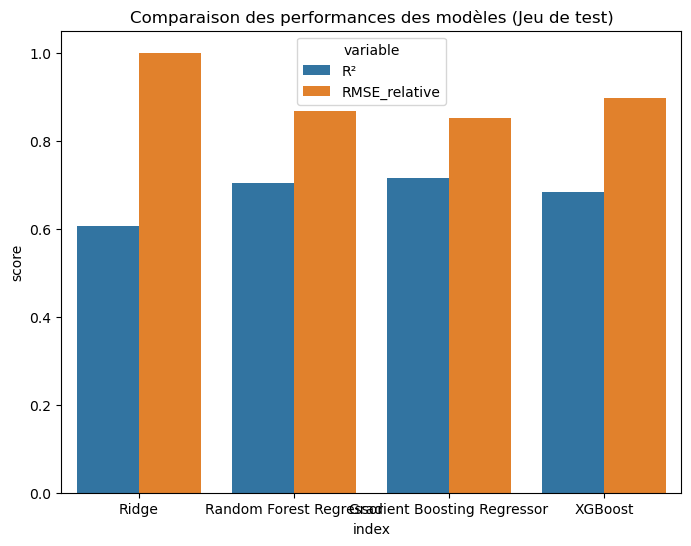

In [56]:
plt.figure(figsize=(8,6))
sns.barplot(x = comparaison_score_melt['index'],
            y = comparaison_score_melt['score'], hue = comparaison_score_melt['variable'])
plt.title('Comparaison des performances des modèles (Jeu de test)')

#### Vérification des prédictions


-  Regardons un exemple pour voir ce que donne la prédiction.

In [57]:
X_extrait = X_test
y_extrait = y_test

In [58]:
X_extrait.head()

,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,âge,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Education,PrimaryPropertyType_Health,PrimaryPropertyType_Hotel/Senior Care/Housing,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Leisure,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Retail,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_Warehouse,Address_100 6th Ave S,Address_100 NE Northlake Way,Address_100 West Harrison,Address_100 West Highland Drive,Address_1000 1st Ave W,Address_1000 1st Ave.,Address_1000 4TH AVE S,Address_1000 Aurora Ave N,Address_1000 E Pike St,Address_1000 Minor Ave,Address_1000 NE 88th St,Address_1000 Queen Anne Ave N,Address_1000 S WELLER ST,Address_1001 2nd Ave W,Address_1001 Alaskan Way,Address_1001 Fairview Ave N,Address_10015 Lake City Way NE,Address_1002 AIRPORT WAY S,Address_1004 Belmont Ave E,Address_1005 E Roy St,Address_1007 First Ave.,Address_101 Elliott Ave West,Address_101 N 104th ST 98133,Address_101 Yesler Way,Address_101 west olympic place,Address_1010 8th Ave S,Address_1011 5th Avenue N,Address_1011 East Terrace Street,Address_1011 Pike ST,Address_1011 Western Ave,Address_1013 8th Ave,Address_1014 1st Ave S,Address_1015 3rd Ave,Address_1015 Second Avenue,Address_1017 W Nickerson St,Address_1017 minor Ave,Address_1018 1st Ave,Address_1020 E. Denny Way,Address_1020 NE 63rd St.,Address_1020 University St,Address_1026 NE 65th St,Address_1029 Summit Ave E,Address_103 1st Ave,Address_103 Bellevue Ave E,Address_10301 Greenwood Ave N,Address_10303 Meridian Ave N,Address_1032 S. Jackson,Address_104 17th Ave South,Address_1045 6th Avenue South,Address_105 5th Ave S,Address_105 South Main St.,Address_1050 w nickerson/1050 w Ewing st.,Address_10521 Meridian ave N,Address_10545 Greenwood Ave. North,Address_106 Bell St,Address_107 Cherry St,Address_107 Occidental Ave S,Address_10700 Meridian Ave North,Address_10735 Roosevelt Way NE,Address_10740 8th AVE NE,Address_10757 Greenwood Ave N,Address_108 5th Avenue S,Address_108 South Washington St,...,"ListOfAllPropertyUseTypes_Office, Other - Lodging/Residential","ListOfAllPropertyUseTypes_Office, Other - Public Services, Personal Services (Health/Beauty, Dry Cleaning, etc), Senior Care Community","ListOfAllPropertyUseTypes_Office, Other - Recreation","ListOfAllPropertyUseTypes_Office, Other - Restaurant/Bar","ListOfAllPropertyUseTypes_Office, Other - Restaurant/Bar, Parking, Retail Store","ListOfAllPropertyUseTypes_Office, Other - Services","ListOfAllPropertyUseTypes_Office, Other - Utility, Parking","ListOfAllPropertyUseTypes_Office, Other, Other - Entertainment/Public Assembly","ListOfAllPropertyUseTypes_Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall","ListOfAllPropertyUseTypes_Office, Other, Other - Restaurant/Bar, Strip Mall","ListOfAllPropertyUseTypes_Office, Other, Other - Services, Residence Hall/Dormitory, Restaurant","ListOfAllPropertyUseTypes_Office, Other, Parking","ListOfAllPropertyUseTypes_Office, Other, Parking, Retail Store","ListOfAllPropertyUseTypes_Office, Other, Refrigerated Warehouse","ListOfAllPropertyUseTypes_Office, Other, Retail Store","ListOfAllPropertyUseTypes_Office, Other, Worship Facility","ListOfAllPropertyUseTypes_Office, Parking","ListOfAllPropertyUseTypes_Office, Parking, Personal Services (Hea

In [59]:
y_extrait.head()

533    18.940806
618    21.275353
671    19.693202
220    20.642315
58     22.468469
Name: Log2-SiteEnergyUseWN(kBtu), dtype: float64

In [60]:
prediction = dict_modeles['Gradient Boosting Regressor'].predict(X_extrait)

In [61]:
pd.DataFrame(prediction).isna().sum()

0    0
dtype: int64

In [62]:
type(y_extrait)

pandas.core.series.Series

In [63]:
predictions = pd.DataFrame([y_extrait, 
                            pd.Series(prediction, index = y_extrait.index),
                           np.exp2(y_extrait)-1,
                           np.exp2(pd.Series(prediction, index = y_extrait.index))-1]).T
predictions.columns = ['y_log', 'y_predict_log', 'y','y_predict']

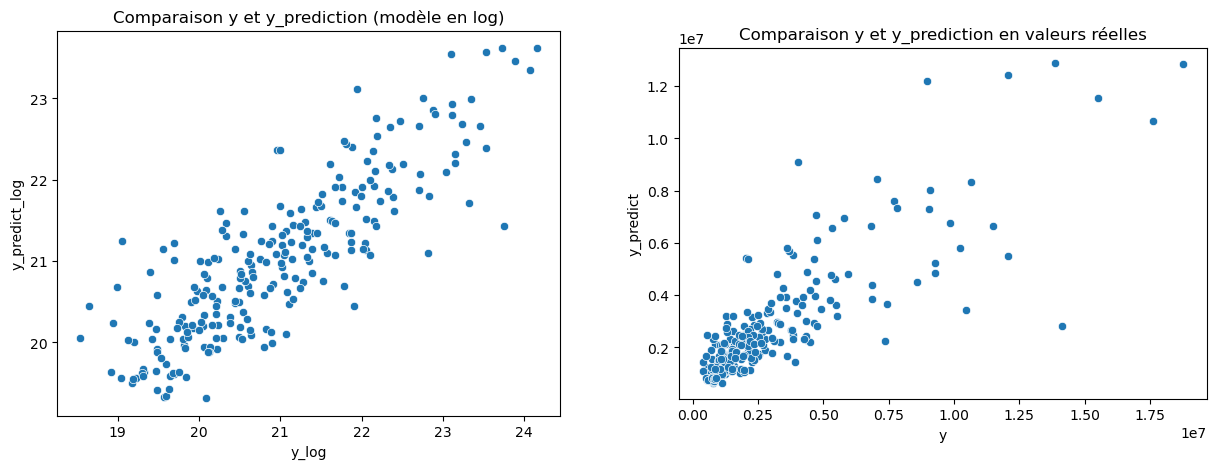

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=False)
sns.scatterplot(x = predictions['y_log'],
               y = predictions['y_predict_log'],
               ax = ax1)
sns.scatterplot(x = predictions['y'],
               y = predictions['y_predict'],
               ax=ax2)
ax1.set_aspect('equal', 'box')

ax2.set_aspect('equal', 'box')

ax1.title.set_text('Comparaison y et y_prediction (modèle en log)')
ax2.title.set_text('Comparaison y et y_prediction en valeurs réelles')